In [1]:
!pip install pandas

In [2]:
!pip install mediapipe opencv-python

In [3]:
from pydub import AudioSegment
from pydub.playback import play

In [4]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [5]:
# VIDEO FEED

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('MediaPipe Feed', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [5]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# Initialize mediapipe pose class.
mp_pose = mp.solutions.pose

# Setup the Pose function for images - independently for the images standalone processing.
pose_image = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)



# Initialize mediapipe drawing class - to draw the landmarks points.
mp_drawing = mp.solutions.drawing_utils

In [7]:
import os
from PIL import Image

# Folder path containing images
folder_path = "E:/capstone/Dataset/testing"

# # List to store image data
# images = []

# # Iterate over files in the folder
# for filename in os.listdir(folder_path):
#     # Check if the file is an image (you might want to add more image extensions)
#     if filename.endswith(".jpg") or filename.endswith(".png"):
#         # Construct the full file path
#         file_path = os.path.join(folder_path, filename)
#         # Open the image using Pillow
#         img = Image.open(file_path)
#         # Append the image to the list
#         images.append(img)
#         # You can perform any processing or testing here with the image

# # Now you have all the images loaded in the 'images' list
# # You can loop through this list to perform testing or processing




# List to store image paths
image_paths = []

# Iterate over files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is an image (you might want to add more image extensions)
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)
        # Append the file path to the list
        file_path.replace("\\",'/')
        image_paths.append(file_path)


In [8]:
image_paths

['E:/capstone/Dataset/testing\\ams_1.png',
 'E:/capstone/Dataset/testing\\ams_10.png',
 'E:/capstone/Dataset/testing\\ams_101.jpeg',
 'E:/capstone/Dataset/testing\\ams_11.png',
 'E:/capstone/Dataset/testing\\ams_12.png',
 'E:/capstone/Dataset/testing\\ams_13.png',
 'E:/capstone/Dataset/testing\\ams_14.png',
 'E:/capstone/Dataset/testing\\ams_15.png',
 'E:/capstone/Dataset/testing\\ams_16.png',
 'E:/capstone/Dataset/testing\\ams_17.png',
 'E:/capstone/Dataset/testing\\ams_18.png',
 'E:/capstone/Dataset/testing\\ams_19.png',
 'E:/capstone/Dataset/testing\\ams_2.png',
 'E:/capstone/Dataset/testing\\ams_20.png',
 'E:/capstone/Dataset/testing\\ams_201.jpeg',
 'E:/capstone/Dataset/testing\\ams_3.png',
 'E:/capstone/Dataset/testing\\ams_301.jpeg',
 'E:/capstone/Dataset/testing\\ams_4.png',
 'E:/capstone/Dataset/testing\\ams_401.jpeg',
 'E:/capstone/Dataset/testing\\ams_5.png',
 'E:/capstone/Dataset/testing\\ams_501.jpeg',
 'E:/capstone/Dataset/testing\\ams_6.png',
 'E:/capstone/Dataset/testin

In [9]:
len(image_paths)

215

In [10]:
# CALCULATE ANGLES

def calculate_angles(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Second 
    c = np.array(c) # Third
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle > 180.0:
        angle = 360-angle
    return angle
    

# testing

In [11]:
import csv


def calculate_angles(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Second 
    c = np.array(c) # Third
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle > 180.0:
        angle = 360-angle
    return angle


# left_arm_data = []
# right_arm_data = []
# left_leg_data = []
# right_leg_data = []

# lower_body=[]
# middle_body=[]
# upper_body=[]
extraams=0
extraau=0
extrabal=0
extrabhu=0
extracat=0
extracam=0
extrasbv=0
extraut=0
ams_list=[]
au_list=[]
bal_list=[]
bhu_list=[]
cat_list=[]
cam_list=[]
sbv_list=[]
ut_list=[]
extra=0
ams=0
bal=0
bhu=0
sbv=0
ut=0
cat=0
cam=0
ytrue=[]
ypred=[]
au=0
correct=0
total=0


amslb=[]
amsmb=[]
amsub=[]



ballb=[]
balmb=[]
balub=[]



bhulb=[]
bhumb=[]
bhuub=[]


auarm=[]
aushldr=[]
auhip=[]
auleg=[]


sbvarm=[]
sbvshldr=[]
sbvhip=[]
sbvleg=[]


utarm=[]
utshldr=[]
uthip=[]
utleg=[]


catarm=[]
catshldr=[]
cathip=[]
catleg=[]


camarm=[]
camshldr=[]
camhip=[]
camleg=[]


total=len(image_paths)

for image_path in image_paths:
    
    
    
    
    img_path = image_path[28:len(image_path)]
    s=""
    for ip in img_path:
        if(ip=="_"):
#             print(s)
            break
        else:
            s+=ip
        
        
    
#     image_path = "E:/capstone/Capstone_Project/DATASET/TEST/tree\\00000031.jpg"
    output = cv2.imread(image_path)

    image_pose = output 
    pose = pose_image
    draw = True
    display = True
    # def detectPose(image_pose, pose, draw=False, display=False):
    

    original_image = image_pose.copy()

    image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB)

    resultant = pose.process(image_in_RGB)
    
    if resultant.pose_landmarks and draw:    


        landmarks = resultant.pose_landmarks.landmark



    ####################################################################
        right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y] 
        left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]

        right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
        left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]

        right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
        left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

        right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
        left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        mid_hip_pt = [(left_hip[0]+right_hip[0])/2 , (left_hip[1]+right_hip[1])/2]


        right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
        left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]

        right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
        left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

        nose = [landmarks[mp_pose.PoseLandmark.NOSE.value].x,landmarks[mp_pose.PoseLandmark.NOSE.value].y]



















    #########################################################
        # CALCULATE THE ANGLE
    #     angle_la = calculate_angles(left_wrist,left_elbow,left_shoulder)  
    #     angle_ra = calculate_angles(right_wrist,right_elbow,right_shoulder)  
    #     angle_ll = calculate_angles(left_hip,left_knee,left_ankle)  
    #     angle_rl = calculate_angles(right_hip,right_knee,right_ankle)  

    
#     Adho mukha savasana

        lower_body_1 = calculate_angles(left_ankle,left_knee,left_hip)
        lower_body_2 = calculate_angles(right_ankle,right_knee,right_hip)

        middle_body_1 = calculate_angles(left_knee,left_hip,left_shoulder)
        middle_body_2 = calculate_angles(right_knee,right_hip,right_shoulder)

        upper_body_1 = calculate_angles(left_hip,left_shoulder,left_wrist)
        upper_body_2 = calculate_angles(right_hip,right_shoulder,right_wrist)
        
        upper_body_1_1 = calculate_angles(left_shoulder,left_elbow,left_wrist)
        upper_body_2_1 = calculate_angles(right_shoulder,right_elbow,right_wrist)
        
        leg_1 = calculate_angles(left_ankle,left_knee,left_hip)
        leg_2 = calculate_angles(right_ankle,right_knee,right_hip)

        hip_1 = calculate_angles(left_knee,left_hip,left_shoulder)
        hip_triangle = calculate_angles(left_ankle,mid_hip_pt,right_ankle)
        hip_2 = calculate_angles(right_knee,right_hip,right_shoulder)
        
        hip_1_1 = calculate_angles(left_knee,left_hip,nose)
        hip_2_2 = calculate_angles(right_knee,right_hip,nose)
        
        
        shoulder_1 = calculate_angles(left_hip,left_shoulder,left_elbow)
        shoulder_2 = calculate_angles(right_hip,right_shoulder,right_elbow)

        arms_1 = calculate_angles(left_shoulder,left_elbow,left_wrist)
        arms_2 = calculate_angles(right_shoulder,right_elbow,right_wrist)



        lb = (lower_body_1 + lower_body_2)/2
        mb = (middle_body_1 + middle_body_2)/2
        ub = (upper_body_1 + upper_body_2)/2     
        ub2 = (upper_body_1_1 + upper_body_2_1)/2


        arms = (arms_1 + arms_2)/2
        shoulder = (shoulder_1 + shoulder_2)/2
        hips = (hip_1 + hip_2)/2
        legs = (leg_1 + leg_2)/2
        
        hips_tri = hip_triangle

        hips_cc = (hip_1_1 + hip_2_2)/2
    
        
        
        
#         ams

        if((lb>=160 and lb<=180) and (mb>=50 and mb<=85) and (ub>=155 and ub<=180)):
            if(s=="ams"):
                
                correct+=1
                ams+=1
                lb=round(lb,2)
                mb=round(mb,2)
                ub=round(ub,2)
                amslb.append(lb)
                amsmb.append(mb)
                amsub.append(ub)
            else:
                extraams+=1
                print(img_path)

    

            
#             uttanasana
        if((arms>=140 and arms<=180) and (shoulder>=75 and shoulder<=115) and (hips>=40 and hips<=70) and (legs>=150 and legs<=180)):
            if(s=="au"):
                correct+=1
                au+=1
                arms=round(arms,2)
                shoulder=round(shoulder,2)
                hips=round(hips,2)
                legs=round(legs,2)
                
                auarm.append(arms)
                aushldr.append(shoulder)
                auhip.append(hips)
                auleg.append(legs)
            else:
                extraau+=1
                print(img_path)

           

            
#             balasana
        
        if((lb>=45 and lb<=70) and (mb>=20 and mb<=50) and (ub2>=135 and ub2<=175)):
            if(s=="bal"):
                correct+=1
                bal+=1
                lb=round(lb,2)
                mb=round(mb,2)
                ub=round(ub,2)
                ballb.append(lb)
                balmb.append(mb)
                balub.append(ub)
            else:
                extrabal+=1
                print(img_path)
 

            
#             bhujangasana

        if((lb>=140 and lb<=175) and (mb>=105 and mb<=145) and (ub2>=140 and ub2<=175)):
            if(s=="bhu"):
                correct+=1
                bhu+=1
                lb=round(lb,2)
                mb=round(mb,2)
                ub=round(ub,2)
                bhulb.append(lb)
                bhumb.append(mb)
                bhuub.append(ub)
            else:
                extrabhu+=1
                print(img_path)
            
            
#             setu bandha

        if((arms>=140 and arms<=180) and (shoulder>=50 and shoulder<=80) and (hips>=135 and hips<=170) and (legs>=50 and legs<=90)):
            if(s=="sbv"):
                correct+=1
                sbv+=1
                
                arms=round(arms,2)
                shoulder=round(shoulder,2)
                hips=round(hips,2)
                legs=round(legs,2)
                
                sbvarm.append(arms)
                sbvshldr.append(shoulder)
                sbvhip.append(hips)
                sbvleg.append(legs)
            else:
                extrasbv+=1
                print(img_path)
                
    


#               trikona


        if((arms>=150 and arms<=180) and (shoulder>=80 and shoulder<=110) and (hips_tri>=75 and hips_tri<=105) and (legs>=155 and legs<=180)):
            if(s=="ut"):
                correct+=1
                ut+=1
                arms=round(arms,2)
                shoulder=round(shoulder,2)
                hips=round(hips,2)
                legs=round(legs,2)
                
                utarm.append(arms)
                utshldr.append(shoulder)
                uthip.append(hips)
                utleg.append(legs)
            else:
                extraut+=1
                print(img_path)

            
#             cat & camel


        if((arms>=165 and arms<=180) and (hips_cc<=90) and (legs>=70 and legs<=110)):
            if(s=="cam"):
                correct+=1
                cam+=1
                
                arms=round(arms,2)
                shoulder=round(shoulder,2)
                hips=round(hips,2)
                legs=round(legs,2)
                
                camarm.append(arms)
                camshldr.append(shoulder)
                camhip.append(hips)
                camleg.append(legs)
                
            else:
                extracam+=1
                print(img_path)
            
        if((arms>=165 and arms<=180) and (hips_cc>=100) and (legs>=70 and legs<=110)):
            if(s=="cat"):
                correct+=1
                cat+=1
                
                arms=round(arms,2)
                shoulder=round(shoulder,2)
                hips=round(hips,2)
                legs=round(legs,2)
                
                catarm.append(arms)
                catshldr.append(shoulder)
                cathip.append(hips)
                catleg.append(legs)
            else:
                extracat+=1
                print(img_path)
#                 
accuracy = (correct/total)*100
print("TOTAL: ",total)
print("ACCURACY: ",accuracy)
print("CORRECT: ",correct)
print("AMS: ",ams)
print("AU: ",au)
print("BAL: ",bal)
print("BHU: ",bhu)
print("CAM: ",cam)
print("CAT: ",cat)
print("SBV: ",sbv)
print("UT: ",ut)
print("EXTRAAMS: ",extraams)
print("EXTRAAU: ",extraau)
print("EXTRABAL: ",extrabal)
print("EXTRABHU: ",extrabhu)
print("EXTRACAT: ",extracat)
print("EXTRACAM: ",extracam)
print("EXTRASBV: ",extrasbv)
print("EXTRAUT: ",extraut)

    

ams_13.png
bhu_203.jpeg
cat_5.png
sbv_ (22).png
sbv_ (9)9.png
sbv_20.png
sbv_406.jpg
ut_19.png
ut_6.png
TOTAL:  215
ACCURACY:  85.5813953488372
CORRECT:  184
AMS:  22
AU:  24
BAL:  19
BHU:  21
CAM:  25
CAT:  27
SBV:  21
UT:  25
EXTRAAMS:  0
EXTRAAU:  0
EXTRABAL:  0
EXTRABHU:  3
EXTRACAT:  5
EXTRACAM:  0
EXTRASBV:  1
EXTRAUT:  0


In [12]:
pip install -U scikit-learn scipy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [13]:
# BAR GRAPH

In [14]:
lbnames=[]
for i in range(1,23):
    s="lb_"+str(i)
    lbnames.append(s)

In [15]:
mbnames=[]
lbnames=[]
ubnames=[]
xaxis=[]
for i in range(1,23):
    s1="lb_"+str(i)
    s2="mb_"+str(i)
    s3="ub_"+str(i)
    xaxis.append(i)
    lbnames.append(s1)
    mbnames.append(s2)
    ubnames.append(s3)

In [16]:
amslb

[178.88,
 169.33,
 176.62,
 178.92,
 176.12,
 174.28,
 173.32,
 177.09,
 177.71,
 178.64,
 178.12,
 176.07,
 174.58,
 176.07,
 176.86,
 170.86,
 176.13,
 176.75,
 176.35,
 176.32,
 178.97,
 172.91]

In [17]:
xaxis

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

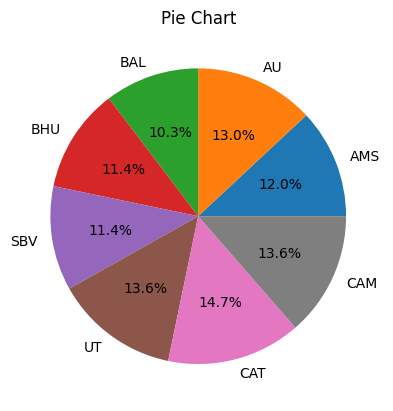

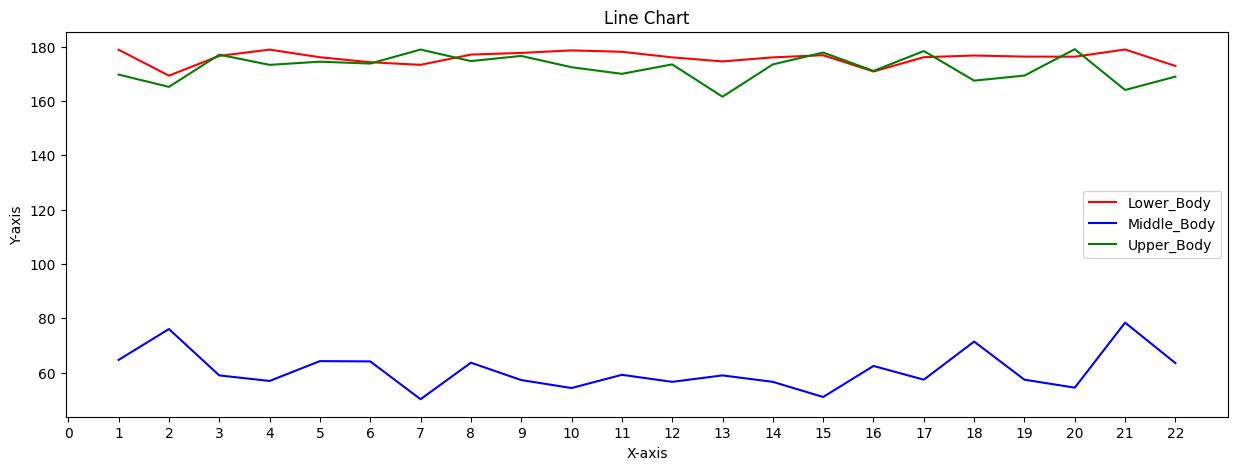

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

xaxis=[]
for i in range(1,23):
    
    xaxis.append(i)
    



# df = pd.DataFrame({'category': ["AMS","AU","BAL","BHU","SBV","UT","CAT","CAM"], 'value': [ams,au,bal,bhu,sbv,ut,cat,cam]})
# plt.bar(df['category'], df['value'])
# plt.xlabel('Yoga')
# plt.ylabel('Correct postures Detected')
# plt.title('Bar Chart')
# plt.show()

df = pd.DataFrame({'category': ["AMS","AU","BAL","BHU","SBV","UT","CAT","CAM"], 'value': [ams,au,bal,bhu,sbv,ut,cat,cam]})
plt.pie(df['value'], labels=df['category'], autopct="%1.1f%%")
plt.title('Pie Chart')
plt.show()





# df = pd.DataFrame({'category': lbnames, 'value': amslb})
# plt.figure(figsize=(15, 5))

# plt.bar(df['category'], df['value'])
# plt.xlabel('Yoga')
# plt.ylabel('Correct postures Detected')
# plt.title('AMS_LB')
# plt.show()


# df = pd.DataFrame({'x': amslb})
# plt.hist(df['x'])
# plt.xlabel('x')
# plt.ylabel('Frequency')
# plt.title('Histogram_AMS_LB')
# plt.show()


# df = pd.DataFrame({'category': amsmb, 'value': amslb})
# plt.pie(df['value'], labels=df['category'], autopct="%1.1f%%")
# plt.title('LOWER_BODY')
# plt.show()




# df = pd.DataFrame({'category': amsmb, 'value': amsmb})
# plt.pie(df['value'], labels=df['category'], autopct="%1.1f%%")
# plt.title('MIDDLE_BODY')
# plt.show()




# df = pd.DataFrame({'category': amsub, 'value': amsub})
# plt.pie(df['value'], labels=df['category'], autopct="%1.1f%%")
# plt.title('UPPER_BODY')
# plt.show()




plt.figure(figsize=(15, 5))
plt.plot(xaxis, amslb,color='red',label='Lower_Body')
plt.plot(xaxis, amsmb,color='blue',label='Middle_Body')
plt.plot(xaxis, amsub,color='green',label='Upper_Body')

# Set the title and labels
plt.title("Line Chart")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# Show the plot
plt.legend()
plt.xticks(np.arange(0, 23, step=1))

plt.show()





# df = pd.DataFrame({'category': mbnames, 'value': amsmb})
# plt.figure(figsize=(15, 5))

# plt.bar(df['category'], df['value'])
# plt.xlabel('Yoga')
# plt.ylabel('Correct postures Detected')
# plt.title('AMS_MB')
# plt.show()


# df = pd.DataFrame({'x': amsmb})
# plt.hist(df['x'])
# plt.xlabel('x')
# plt.ylabel('Frequency')
# plt.title('Histogram_AMS_MB')
# plt.show()

# plt.figure(figsize=(15, 5))
# plt.plot(mbnames, amsmb)
# # Set the title and labels
# plt.title("Line Chart")
# plt.xlabel("X-axis")
# plt.ylabel("Y-axis")
# # Show the plot
# plt.show()




# df = pd.DataFrame({'category': ubnames, 'value': amsub})
# plt.figure(figsize=(15, 5))

# plt.bar(df['category'], df['value'])
# plt.xlabel('Yoga')
# plt.ylabel('Correct postures Detected')
# plt.title('AMS_UB')
# plt.show()


# df = pd.DataFrame({'x': amsub})
# plt.hist(df['x'])
# plt.xlabel('x')
# plt.ylabel('Frequency')
# plt.title('Histogram_AMS_UB')
# plt.show()


# plt.figure(figsize=(15, 5))
# plt.plot(ubnames, amsub)
# # Set the title and labels
# plt.title("Line Chart")
# plt.xlabel("X-axis")
# plt.ylabel("Y-axis")
# # Show the plot
# plt.show()



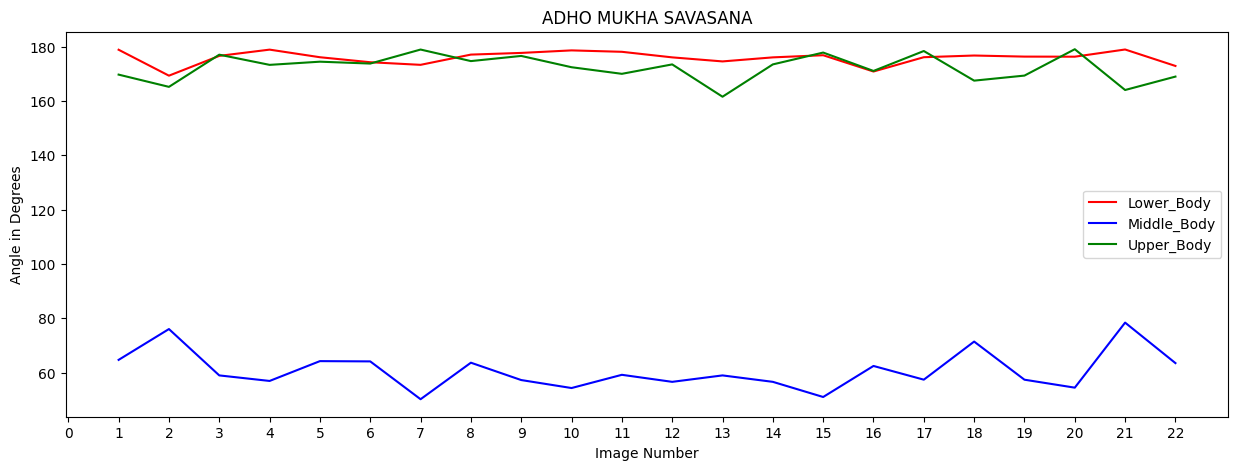

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

xaxis=[]
for i in range(1,23):
    
    xaxis.append(i)
    


plt.figure(figsize=(15, 5))
plt.plot(xaxis, amslb,color='red',label='Lower_Body')
plt.plot(xaxis, amsmb,color='blue',label='Middle_Body')
plt.plot(xaxis, amsub,color='green',label='Upper_Body')

# Set the title and labels
plt.title("ADHO MUKHA SAVASANA")
plt.xlabel("Image Number")
plt.ylabel("Angle in Degrees")
# Show the plot
plt.legend()
plt.xticks(np.arange(0, 23, step=1))

plt.show()



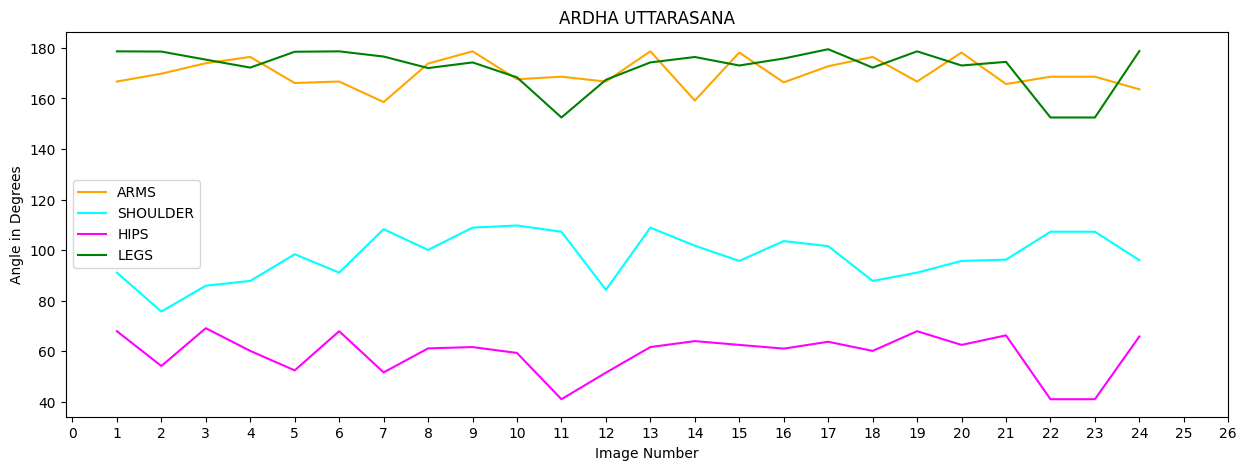

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

xaxis=[]
for i in range(1,25):
    
    xaxis.append(i)
    

    
plt.figure(figsize=(15, 5))
plt.plot(xaxis, auarm,color='orange',label='ARMS')
plt.plot(xaxis, aushldr,color='cyan',label='SHOULDER')
plt.plot(xaxis, auhip,color='magenta',label='HIPS')
plt.plot(xaxis, auleg,color='green',label='LEGS')

# Set the title and labels
plt.title("ARDHA UTTARASANA")
plt.xlabel("Image Number")
plt.ylabel("Angle in Degrees")
# Show the plot
plt.legend()
plt.xticks(np.arange(0, 27, step=1))

plt.show()

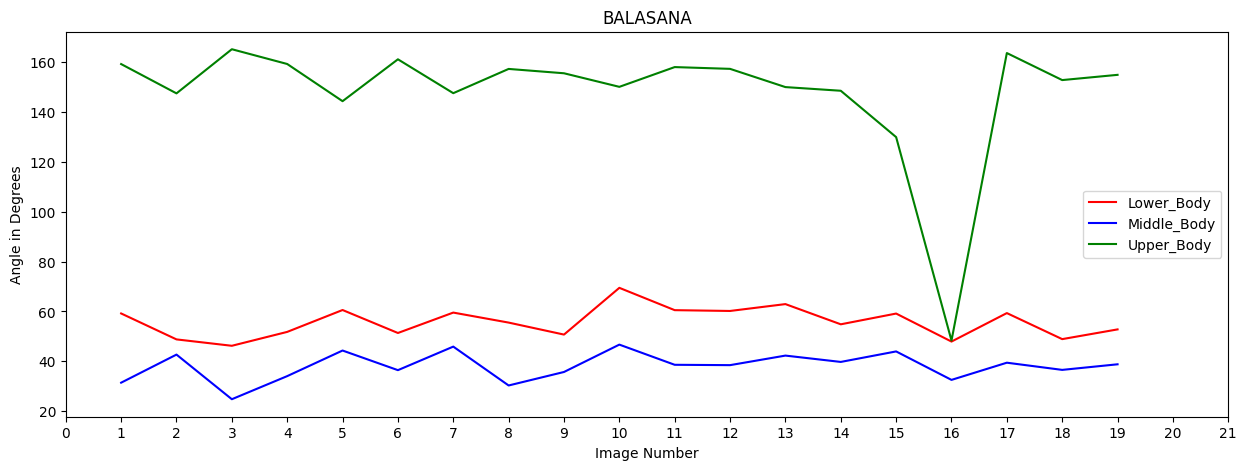

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

xaxis=[]
for i in range(1,20):
    
    xaxis.append(i)
    


plt.figure(figsize=(15, 5))
plt.plot(xaxis, ballb,color='red',label='Lower_Body')
plt.plot(xaxis, balmb,color='blue',label='Middle_Body')
plt.plot(xaxis, balub,color='green',label='Upper_Body')

# Set the title and labels
plt.title("BALASANA")
plt.xlabel("Image Number")
plt.ylabel("Angle in Degrees")
# Show the plot
plt.legend()
plt.xticks(np.arange(0, 22, step=1))

plt.show()



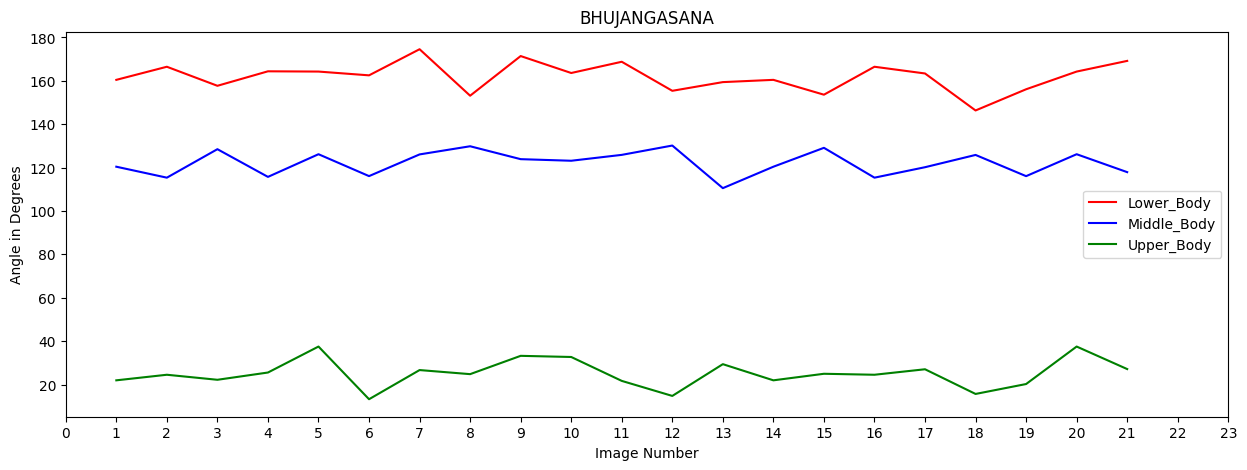

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

xaxis=[]
for i in range(1,22):
    
    xaxis.append(i)
    


plt.figure(figsize=(15, 5))
plt.plot(xaxis, bhulb,color='red',label='Lower_Body')
plt.plot(xaxis, bhumb,color='blue',label='Middle_Body')
plt.plot(xaxis, bhuub,color='green',label='Upper_Body')

# Set the title and labels
plt.title("BHUJANGASANA")
plt.xlabel("Image Number")
plt.ylabel("Angle in Degrees")
# Show the plot
plt.legend()
plt.xticks(np.arange(0, 24, step=1))

plt.show()



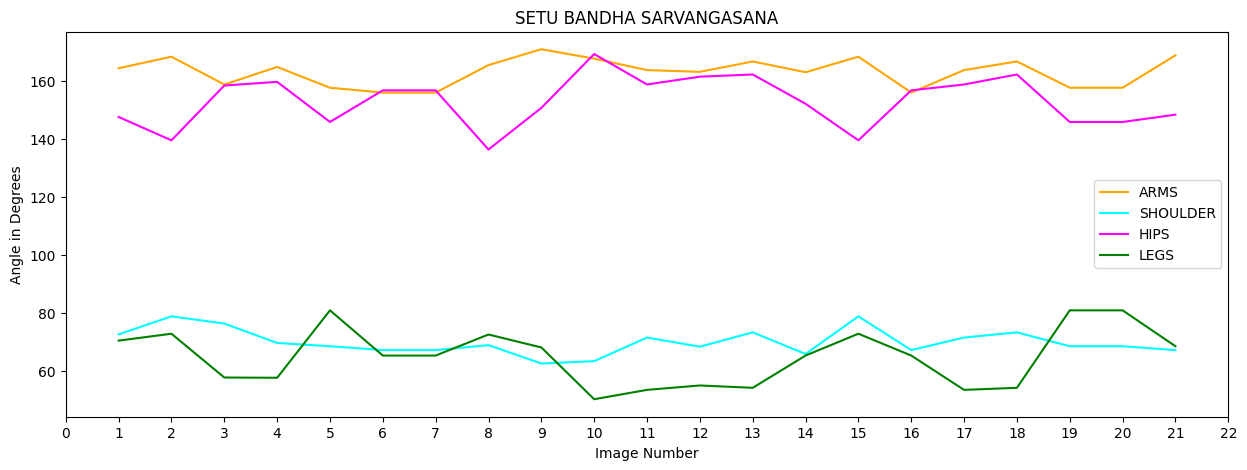

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

xaxis=[]
for i in range(1,22):
    
    xaxis.append(i)
    

    
plt.figure(figsize=(15, 5))
plt.plot(xaxis, sbvarm,color='orange',label='ARMS')
plt.plot(xaxis, sbvshldr,color='cyan',label='SHOULDER')
plt.plot(xaxis, sbvhip,color='magenta',label='HIPS')
plt.plot(xaxis, sbvleg,color='green',label='LEGS')

# Set the title and labels
plt.title("SETU BANDHA SARVANGASANA")
plt.xlabel("Image Number")
plt.ylabel("Angle in Degrees")
# Show the plot
plt.legend()
plt.xticks(np.arange(0, 23, step=1))

plt.show()

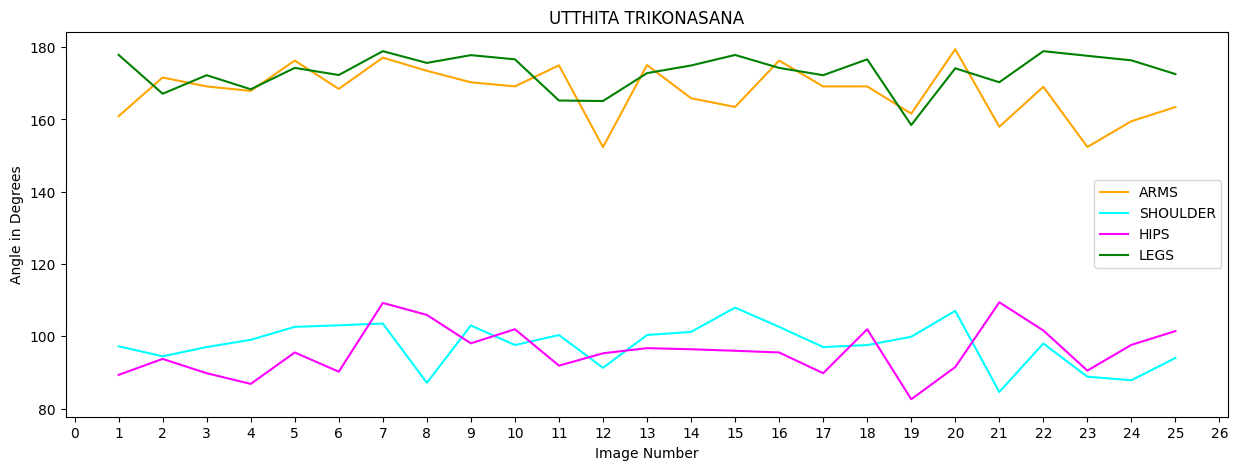

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

xaxis=[]
for i in range(1,26):
    
    xaxis.append(i)
    

    
plt.figure(figsize=(15, 5))
plt.plot(xaxis, utarm,color='orange',label='ARMS')
plt.plot(xaxis, utshldr,color='cyan',label='SHOULDER')
plt.plot(xaxis, uthip,color='magenta',label='HIPS')
plt.plot(xaxis, utleg,color='green',label='LEGS')

# Set the title and labels
plt.title("UTTHITA TRIKONASANA")
plt.xlabel("Image Number")
plt.ylabel("Angle in Degrees")
# Show the plot
plt.legend()
plt.xticks(np.arange(0, 27, step=1))

plt.show()

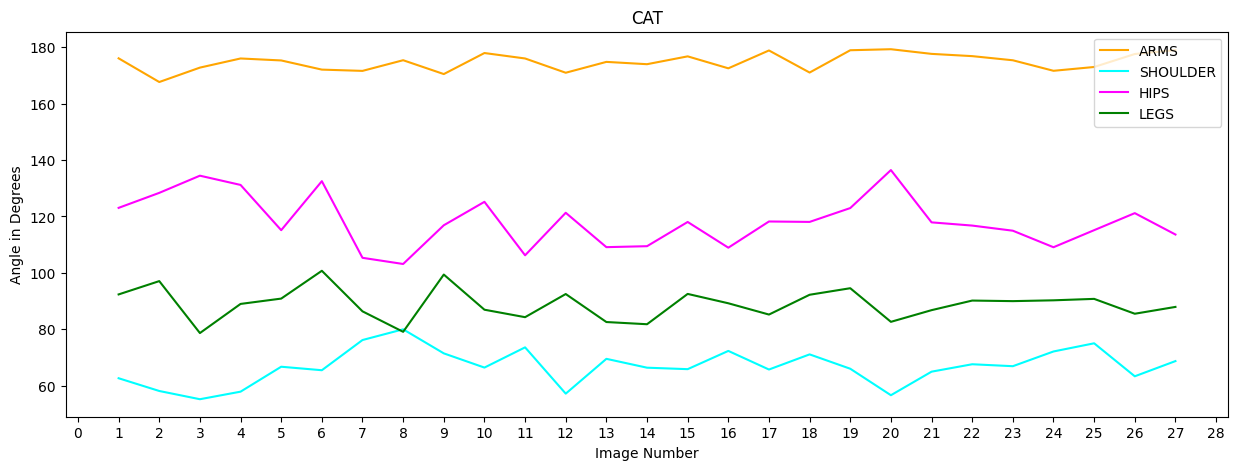

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

xaxis=[]
for i in range(1,28):
    
    xaxis.append(i)
    

    
plt.figure(figsize=(15, 5))
plt.plot(xaxis, catarm,color='orange',label='ARMS')
plt.plot(xaxis, catshldr,color='cyan',label='SHOULDER')
plt.plot(xaxis, cathip,color='magenta',label='HIPS')
plt.plot(xaxis, catleg,color='green',label='LEGS')

# Set the title and labels
plt.title("CAT")
plt.xlabel("Image Number")
plt.ylabel("Angle in Degrees")
# Show the plot
plt.legend()
plt.xticks(np.arange(0, 29, step=1))

plt.show()

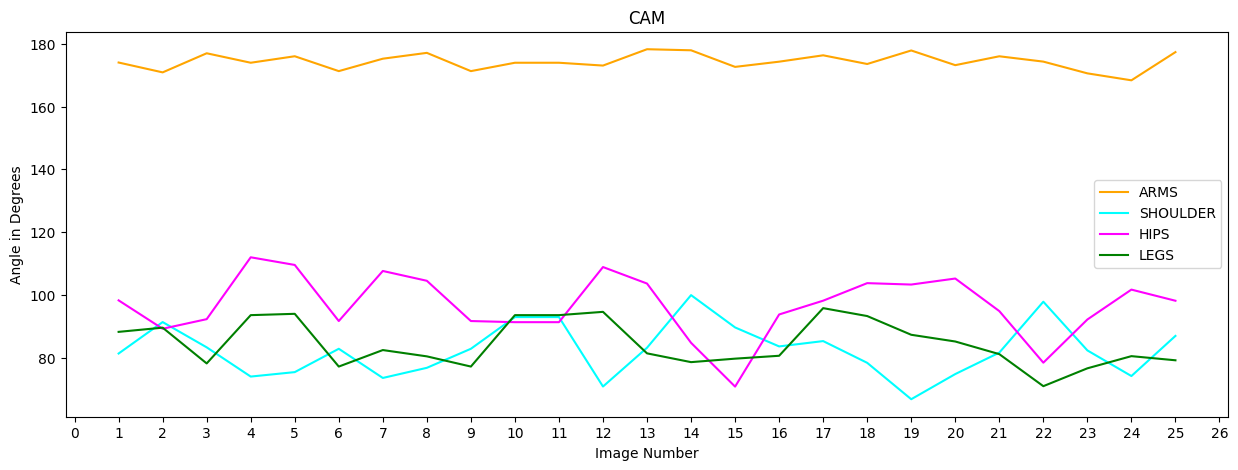

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

xaxis=[]
for i in range(1,26):
    
    xaxis.append(i)
    

    
plt.figure(figsize=(15, 5))
plt.plot(xaxis, camarm,color='orange',label='ARMS')
plt.plot(xaxis, camshldr,color='cyan',label='SHOULDER')
plt.plot(xaxis, camhip,color='magenta',label='HIPS')
plt.plot(xaxis, camleg,color='green',label='LEGS')

# Set the title and labels
plt.title("CAM")
plt.xlabel("Image Number")
plt.ylabel("Angle in Degrees")
# Show the plot
plt.legend()
plt.xticks(np.arange(0, 27, step=1))

plt.show()

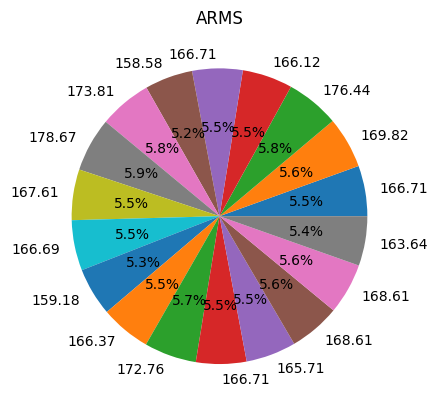

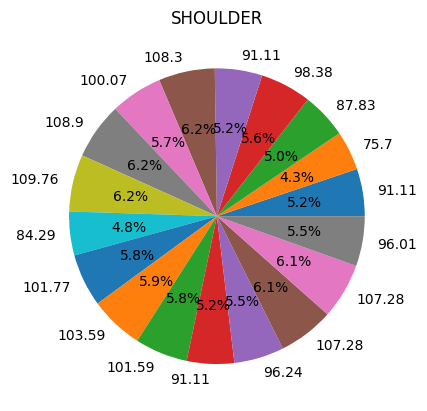

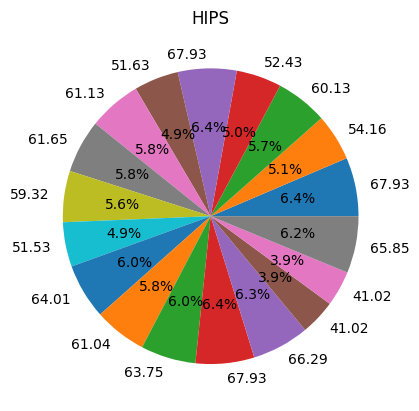

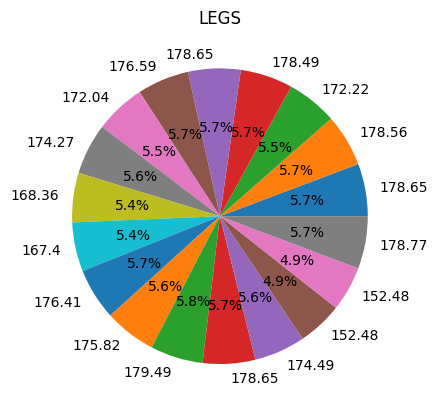

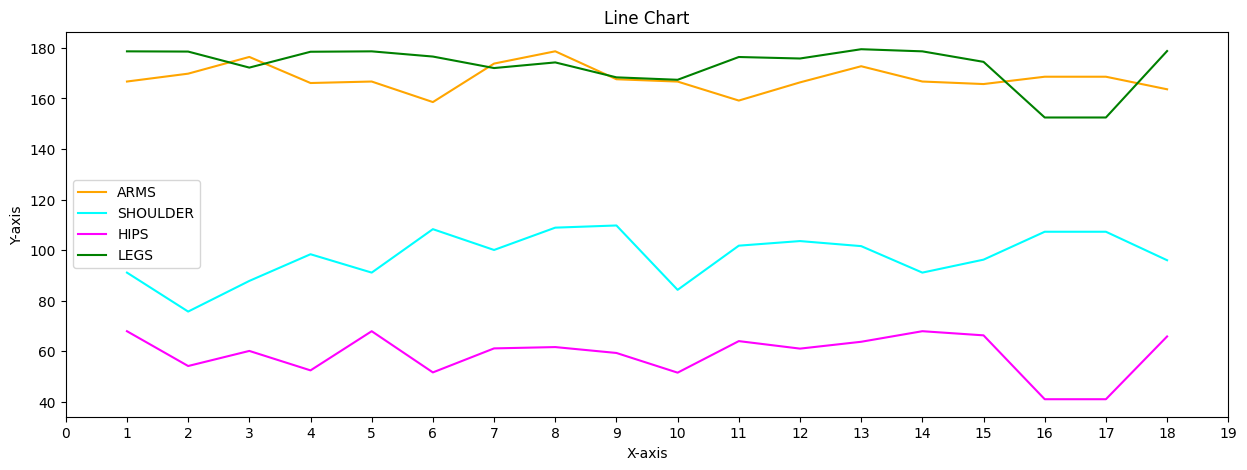

In [50]:


# import pandas as pd
# import matplotlib.pyplot as plt



# df = pd.DataFrame({'category': arm, 'value': arm})
# plt.pie(df['value'], labels=df['category'], autopct="%1.1f%%")
# plt.title('ARMS')
# plt.show()




# df = pd.DataFrame({'category': shldr, 'value': shldr})
# plt.pie(df['value'], labels=df['category'], autopct="%1.1f%%")
# plt.title('SHOULDER')
# plt.show()




# df = pd.DataFrame({'category': hip, 'value': hip})
# plt.pie(df['value'], labels=df['category'], autopct="%1.1f%%")
# plt.title('HIPS')
# plt.show()




# df = pd.DataFrame({'category': leg, 'value': leg})
# plt.pie(df['value'], labels=df['category'], autopct="%1.1f%%")
# plt.title('LEGS')
# plt.show()




# plt.figure(figsize=(15, 5))
# plt.plot(xaxis, arm,color='orange',label='ARMS')
# plt.plot(xaxis, shldr,color='cyan',label='SHOULDER')
# plt.plot(xaxis, hip,color='magenta',label='HIPS')
# plt.plot(xaxis, leg,color='green',label='LEGS')

# # Set the title and labels
# plt.title("Line Chart")
# plt.xlabel("X-axis")
# plt.ylabel("Y-axis")
# # Show the plot
# plt.legend()
# plt.xticks(np.arange(0, 20, step=1))

# plt.show()





In [25]:
pip install matplotlib seaborn plotly


Note: you may need to restart the kernel to use updated packages.


In [26]:
for image_path in image_paths:
    img_path = image_path[28:len(image_path)]
    s=""
    for ip in img_path:
        if(ip=="_"):
            print(s)
            break
        else:
            s+=ip
        
        
#     print(img_path)

ams
ams
ams
ams
ams
ams
ams
ams
ams
ams
ams
ams
ams
ams
ams
ams
ams
ams
ams
ams
au
au
au
au
au
au
au
au
au
au
au
au
au
au
au
au
au
au
au
au
bal
bal
bal
bal
bal
bal
bal
bal
bal
bal
bal
bal
bal
bal
bal
bal
bal
bal
bal
bal
bhu
bhu
bhu
bhu
bhu
bhu
bhu
bhu
bhu
bhu
bhu
bhu
bhu
bhu
bhu
bhu
bhu
bhu
bhu
bhu
cam
cam
cam
cam
cam
cam
cam
cam
cam
cam
cam
cam
cam
cam
cam
cam
cam
cam
cam
cam
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
sbv
sbv
sbv
sbv
sbv
sbv
sbv
sbv
sbv
sbv
sbv
sbv
sbv
sbv
sbv
sbv
sbv
sbv
sbv
ut
ut
ut
ut
ut
ut
ut
ut
ut
ut
ut
ut
ut
ut
ut
ut
ut
ut
ut
ut
